# Understanding optical non-additivity

Optical non-additivity is negligible in the limit of sharply peaked lead spectral densities:
- Strong phonon coupling-dependence on molecule-leads coupling for small SD window dominates behaviour.
- For small wider lead spectral densities, the phonon coupling 
Here I will find a regime where optical non-additivity is important and could potentially lead to deleterious effects or enhancements.

In [1]:
%matplotlib inline
import time 

from qutip import mesolve, steadystate
#from importlib import reload



import numpy as np
import optical as EM
import phonons as RC
import leads as FL
from utils import *
from photocell_setup import *
import matplotlib.pyplot as plt
from style import *

utils imported


In [2]:
def short_current_from_dict(dd):
    # assumes that V=0 at element 0
    return dd['current'][0]

def calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian', N_max=18, 
                            delta_leads=10e-3, normalise=True):
    
    data = []
    data_add = []
    for BE in binding_energies: #[0., 0.025, 0.05, 0.075, 0.1, 0.2]:
        I_SC = []
        I_SC_add = []
        N_values = [int(n) for n in np.linspace(3,N_max,len(alpha_values))]
        for N, alpha in zip(N_values, alpha_values):
            PARAMS = PARAMS_setup(valence_energy=100e-3, binding_energy=BE, radiative_lifetime=1, 
                                  alpha_ph=alpha, mu=700e-3, bias_voltage=0, N=N, silent=True, 
                                  T_C=300., lead_SD=lead_SD, delta_leads=delta_leads)
            data_dict = populations_and_current_vs_voltage(PARAMS, x_range=[0.1,0.3],num_voltages=1)
            data_dict_add = additive_populations_and_current_vs_voltage(PARAMS, x_range=[0.1,0.3],num_voltages=1)
            #print(data_dict['current'])
            I_SC.append(short_current_from_dict(data_dict))
            I_SC_add.append(short_current_from_dict(data_dict_add))
            
        data.append(np.array(I_SC))
        data_add.append(np.array(I_SC_add))
        norm1 = norm2 = 1.
        if normalise:
            norm1 = I_SC[0]
            norm2 = I_SC_add[0]
        plt.plot(alpha_values*1000, np.array(I_SC)/norm1, label="Non-additive", color='b') #label='U={}meV'.format(int(BE*100)))
        plt.plot(alpha_values*1000, np.array(I_SC_add)/norm2, label='Additive EM', ls='dashed', color='r')
    plt.xlim(alpha_values[0]*1000, alpha_values[-1]*1000)
    plt.xlabel(r"$\alpha$ $(meV)$")
    plt.ylabel(r"$I_{SC}$ (normalised)")
    plt.axhline(np.array(I_SC)[0]/norm1, label="Additive", color='grey', alpha=0.9)
    plt.legend()
    return np.array(data), np.array(data_add)

C-V data calculated in 1.7 seconds
C-V data calculated in 1.7 seconds
C-V data calculated in 1.9 seconds
C-V data calculated in 1.9 seconds
C-V data calculated in 3.4 seconds
C-V data calculated in 3.0 seconds
C-V data calculated in 4.9 seconds
C-V data calculated in 4.5 seconds
C-V data calculated in 7.0 seconds
C-V data calculated in 6.4 seconds
C-V data calculated in 9.5 seconds
C-V data calculated in 8.7 seconds
C-V data calculated in 9.5 seconds
C-V data calculated in 8.7 seconds
C-V data calculated in 13.2 seconds
C-V data calculated in 13.1 seconds
C-V data calculated in 18.3 seconds
C-V data calculated in 17.3 seconds
C-V data calculated in 22.9 seconds
C-V data calculated in 22.3 seconds
C-V data calculated in 28.0 seconds
C-V data calculated in 28.4 seconds


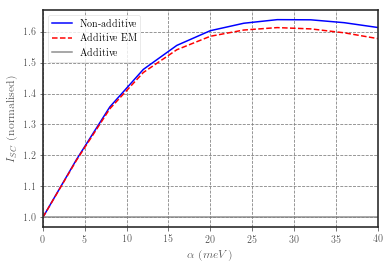

In [6]:
binding_energies = np.linspace(0.05, 0.1, 1)
alpha_values = np.linspace(0, 40e-3, 11)
data1, datadd1 = calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian', 
                                       delta_leads=10e-3, N_max=11, normalise=True)
plt.savefig("additive_comp_narrow.pdf")

C-V data calculated in 1.9 seconds
C-V data calculated in 1.6 seconds
C-V data calculated in 2.0 seconds
C-V data calculated in 1.9 seconds
C-V data calculated in 3.5 seconds
C-V data calculated in 3.2 seconds
C-V data calculated in 3.4 seconds
C-V data calculated in 3.1 seconds
C-V data calculated in 5.1 seconds
C-V data calculated in 5.0 seconds
C-V data calculated in 5.1 seconds
C-V data calculated in 5.1 seconds
C-V data calculated in 7.6 seconds
C-V data calculated in 7.0 seconds
C-V data calculated in 7.6 seconds
C-V data calculated in 7.0 seconds
C-V data calculated in 10.4 seconds
C-V data calculated in 9.5 seconds
C-V data calculated in 10.5 seconds
C-V data calculated in 9.6 seconds
C-V data calculated in 14.3 seconds
C-V data calculated in 14.3 seconds
C-V data calculated in 14.5 seconds
C-V data calculated in 14.5 seconds
C-V data calculated in 19.1 seconds
C-V data calculated in 18.9 seconds
C-V data calculated in 19.1 seconds
C-V data calculated in 19.0 seconds
C-V data c

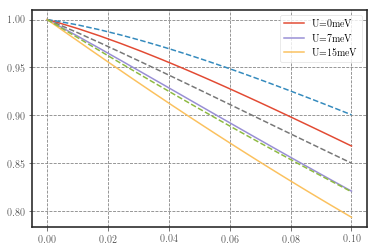

In [5]:



binding_energies = np.linspace(0.0, 0.15, 3)
alpha_values = np.linspace(0, 100e-3, 30)
data, datadd = calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian')

C-V data calculated in 1.6 seconds
C-V data calculated in 1.6 seconds
C-V data calculated in 2.0 seconds
C-V data calculated in 1.9 seconds
C-V data calculated in 3.2 seconds
C-V data calculated in 3.2 seconds
C-V data calculated in 5.2 seconds
C-V data calculated in 4.8 seconds
C-V data calculated in 7.1 seconds
C-V data calculated in 6.4 seconds
C-V data calculated in 6.9 seconds
C-V data calculated in 6.6 seconds
C-V data calculated in 9.5 seconds
C-V data calculated in 8.8 seconds
C-V data calculated in 13.7 seconds
C-V data calculated in 13.1 seconds
C-V data calculated in 17.3 seconds
C-V data calculated in 17.3 seconds
C-V data calculated in 22.2 seconds
C-V data calculated in 22.2 seconds


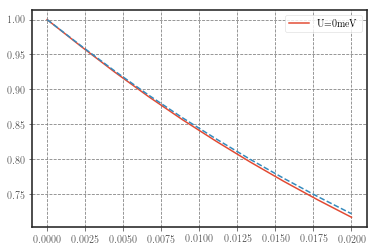

In [12]:
binding_energies = np.linspace(0.0, 0.05, 1)
alpha_values = np.linspace(0, 20e-3, 10)
data, datadd = calculate_current_slope(binding_energies, alpha_values, lead_SD='Lorentzian', 
                                       delta_leads=10e-3, N_max=10)

C-V data calculated in 1.5 seconds
C-V data calculated in 1.5 seconds
C-V data calculated in 1.8 seconds
C-V data calculated in 1.7 seconds
C-V data calculated in 3.1 seconds
C-V data calculated in 2.9 seconds
C-V data calculated in 4.8 seconds
C-V data calculated in 4.6 seconds
C-V data calculated in 7.0 seconds
C-V data calculated in 6.6 seconds
C-V data calculated in 10.6 seconds
C-V data calculated in 9.8 seconds
C-V data calculated in 10.5 seconds
C-V data calculated in 9.7 seconds
C-V data calculated in 14.8 seconds
C-V data calculated in 14.0 seconds
C-V data calculated in 18.0 seconds
C-V data calculated in 18.5 seconds
C-V data calculated in 22.4 seconds
C-V data calculated in 22.3 seconds
C-V data calculated in 29.9 seconds
C-V data calculated in 28.2 seconds


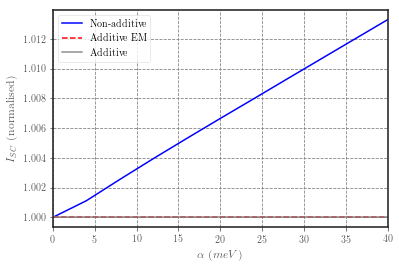

In [7]:
binding_energies = np.linspace(0.0, 0.05, 1)
alpha_values = np.linspace(0, 40e-3, 11)
data, datadd = calculate_current_slope(binding_energies, alpha_values, lead_SD='flat', 
                                       delta_leads=10e-3, N_max=11, normalise=True)
plt.savefig("additive_comp_wide.pdf")

In [ ]:
, color='b'

In [ ]:
def populations_and_current_vs_voltage_all(PARAMS, x_range=[0.,1.4], num_voltages=100, label=''):
    
    if PARAMS['T_L']<100:
        number_of_voltages = int(1.8*num_voltages)
    else:
        number_of_voltages = num_voltages
    bias_voltages = np.concatenate((np.array([0]), 
                                    np.linspace(x_range[0]*ev_to_inv_cm, x_range[1]*ev_to_inv_cm, number_of_voltages)), 
                                   axis=0)
    labels = zip(["L_R", "L_R", "L_R_add", "L_R_add"], # Right lead 
                 ["L", "L_add_EM", "L_add_leads", "L_add"]) #and full dissipators (for current)
    data_dict = {} # inner dicts are of current and population data etc.
    for theory in labels:
        ti = time.time()
        current = []
        conduction_population = []
        valence_population = []
        ground_population = []
        hole_population = []
        electron_population = []
        exciton_population = []
        CC_population = []
        ops = make_expectation_operators(PARAMS)
        for i, bv in enumerate(bias_voltages):
            PARAMS.update({'mu_R': PARAMS['mu']+bv/2, 'mu_L': PARAMS['mu']-bv/2})
            #if i in [10, 90]:
            #    print_PARAMS(PARAMS)
            L_Lindblad_dict = build_L(PARAMS, silent=True)
            #ops = make_expectation_operators(PARAMS)
            n_c = tensor(d_e.dag()*d_e, qeye(PARAMS['N']))
            n_v = tensor(d_h.dag()*d_h, qeye(PARAMS['N']))
            ss = steadystate(L_Lindblad_dict['H_S'], [L_Lindblad_dict[theory[1]]])
            current.append(current_from_ss(ss, L_Lindblad_dict[theory[0]], n_c))
            conduction_population.append((n_c*ss).tr())
            valence_population.append((n_v*ss).tr())
            ground_population.append((ops['vac']*ss).tr())
            hole_population.append((ops['hole']*ss).tr())
            electron_population.append((ops['electron']*ss).tr())
            exciton_population.append((ops['exciton']*ss).tr())
            CC_population.append((ops['CC_pop']*ss).tr())
        data_dict[theory[1]] = {'bias_voltages':bias_voltages/ev_to_inv_cm, 
                     'current': current,
                     'conduction_population' : conduction_population, 
                     'valence_population' : valence_population,
                     'ground_population': ground_population,
                     'hole_population' : hole_population,
                     'electron_population' : electron_population,
                     'exciton_population' : exciton_population,
                     'CC_population' : CC_population,
                    'PARAMS': PARAMS}
        print("C-V {} calculated in {:0.1f} seconds".format(theory[1], time.time() - ti))
    save_obj(data_dict, "DATA/pvp/all_"+label)
    return data_dict

In [ ]:
populations_and_current_vs_voltage_all(PARAMS, x_range=[0.,1.4], num_voltages=30, label='')